In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import plotly.express as px

import requests
from bs4 import BeautifulSoup

import re
import time

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
import joblib
import time

In [2]:
resale_df = joblib.load("cars_24_south_india.pkl")

In [125]:
resale_df.mean()

Year released             2017.113156
Days in market            1993.762859
Kilometers_travelled     45932.034109
EMI (₹/month)            12541.085003
Price INR(₹)            651889.917704
dtype: float64

In [126]:
resale_df.median()

Year released             2017.0
Days in market            2005.0
Kilometers_travelled     43676.0
EMI (₹/month)            11052.0
Price INR(₹)            565299.0
dtype: float64

In [128]:
resale_df.std()

Year released                2.577861
Days in market             941.181129
Kilometers_travelled     26011.074261
EMI (₹/month)             6045.801060
Price INR(₹)            326762.896866
dtype: float64

In [129]:
resale_df.var()

Year released           6.645369e+00
Days in market          8.858219e+05
Kilometers_travelled    6.765760e+08
EMI (₹/month)           3.655171e+07
Price INR(₹)            1.067740e+11
dtype: float64

In [130]:
resale_df.skew()

Year released          -0.636800
Days in market          0.635304
Kilometers_travelled    0.626777
EMI (₹/month)           1.436006
Price INR(₹)            1.474208
dtype: float64

In [131]:
resale_df.describe()

,Days in market,Kilometers_travelled,EMI (₹/month),Price INR(₹)
count,1847.000000,1847.000000,1847.000000,1.847000e+03
mean,1993.762859,45932.034109,12541.085003,6.518899e+05
std,941.181129,26011.074261,6045.801060,3.267629e+05
min,183.000000,350.000000,3589.000000,1.835990e+05
25%,1311.000000,24467.500000,8229.000000,4.208990e+05
50%,2005.000000,43676.000000,11052.000000,5.652990e+05
75%,2420.000000,65378.000000,15221.000000,7.846490e+05
max,4618.000000,235466.000000,37678.000000,2.006399e+06


In [127]:
resale_df.mode()

,Car Brand,Varient,Year released,Days in market,fuel_varient,car_transmission,owned,Kilometers_travelled,EMI (₹/month),Price INR(₹),Travelled kilometers range,Body type
0,Maruti suzuki,Grand i10,2018,1319.0,Petrol,Manual,1st,7725,6772.0,346399.0,44000,Hatchback
1,NaN,NaN,NaN,1660.0,NaN,NaN,NaN,9445,7822.0,400099.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16146,10727.0,548699.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18954,15034.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19605,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23957,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28610,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38379,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41010,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42849,NaN,NaN,NaN,NaN


In [122]:
resale_df.drop(['Days in market range'], axis=1,inplace=True)
resale_df.isnull().sum()

Car Brand                      0
Varient                        0
Year released                  0
Days in market                 0
fuel_varient                   0
car_transmission               0
owned                          0
Kilometers_travelled           0
EMI (₹/month)                  0
Price INR(₹)                   0
Travelled kilometers range     0
Body type                      0
dtype: int64

In [4]:
maurti_varient_df = joblib.load("maruti_varient_df.pkl")

In [6]:
maurti_varient_df

,Varient,Car Brand,Year released,Days in market,fuel_varient,car_transmission,owned,Kilometers_travelled,EMI (₹/month),Price INR(₹),Days in market range,Travelled kilometers range
0,Alto series,Maruti suzuki,2014,3144,Petrol,Manual,1st,15260,5533,282999,3200,16000
1,Ritz,Maruti suzuki,2011,4208,Petrol,Manual,1st,40032,7916,404899,4400,41000
2,Alto series,Maruti suzuki,2010,4597,Petrol,Manual,1st,7956,3599,184099,4600,8000
3,Alto series,Maruti suzuki,2016,2411,Petrol,Manual,1st,101405,4358,222899,2600,102000
4,Swift,Maruti suzuki,2021,601,Petrol,Manual,1st,82591,13318,681199,800,83000
...,...,...,...,...,...,...,...,...,...,...,...,...
534,Ritz,Maruti suzuki,2010,4574,Petrol,Manual,1st,75030,6184,316299,4600,76000
535,Baleno,Maruti suzuki,2016,2428,Petrol,Manual,2nd,57433,10735,549099,2600,58000
536,S PRESSO,Maruti suzuki,2020,946,Petrol,Manual,1st,28849,10252,524399,1000,29000
537,Wagon R series,Maruti suzuki,2010,4595,Petrol,Manual,2nd,29450,5683,290699,4600,30000


In [5]:
Hyundai_varient_df = joblib.load("Hyundai_hatchback_varient_df.pkl")

In [7]:
Hyundai_varient_df

,Car Brand,Varient,Year released,Days in market,fuel_varient,car_transmission,owned,Kilometers_travelled,EMI (₹/month),Price INR(₹),Days in market range,Travelled kilometers range,Body type
1,Hyundai,i10,2012,3880,Petrol,Automatic,1st,14075,7822,400099,4000,15000,Hatchback
2,Hyundai,i10,2014,3128,Petrol,Manual,1st,18897,6870,351399,3200,19000,Hatchback
3,Hyundai,AURA,2022,188,Petrol,Manual,1st,2903,15436,821999,200,3000,Sedan
4,Maruti suzuki,Ertiga,2020,933,Petrol,Manual,1st,17115,22077,1175599,1000,18000,MUV
5,Maruti suzuki,Alto 800,2014,3144,Petrol,Manual,1st,15260,5533,282999,3200,16000,Hatchback
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,Maruti suzuki,Alto 800,2016,2389,Petrol,Manual,1st,24174,6037,308799,2400,25000,Hatchback
1898,Hyundai,Elite i20,2017,2062,Petrol,Manual,1st,37241,12008,614199,2200,38000,Hatchback
1899,Honda,BR-V,2016,2420,Petrol,Manual,2nd,62742,15456,790599,2600,63000,SUV
1900,Mahindra,XUV500,2020,944,Diesel,Automatic,1st,7725,32074,1707999,1000,8000,SUV


In [8]:
hatchback_df = resale_df.loc[resale_df['Body type'] == 'Hatchback'].drop(['Body type'], axis=1)

SUV_df = resale_df.loc[resale_df['Body type'] == 'SUV'].drop(['Body type'], axis=1)

Sedan_df = resale_df.loc[resale_df['Body type'] == 'Sedan'].drop(['Body type'], axis=1)

Minivan_df = resale_df.loc[resale_df['Body type'] == 'Minivan'].drop(['Body type'], axis=1)

MUV_df = resale_df.loc[resale_df['Body type'] == 'MUV'].drop(['Body type'], axis=1)

In [145]:
resale_df['Car Brand'].value_counts()

Maruti suzuki    726
Hyundai          496
Honda            137
Renault          107
Tata              91
Ford              67
Mahindra          44
Volkswagen        39
Toyota            28
KIA               27
Datsun            21
Jeep              21
MG                16
Nissan            14
Skoda             13
Name: Car Brand, dtype: int64

In [149]:
MG_varient_df = resale_df.loc[resale_df['Car Brand'] == 'MG']
MG_varient_df

,Car Brand,Varient,Year released,Days in market,fuel_varient,car_transmission,owned,Kilometers_travelled,EMI (₹/month),Price INR(₹),Travelled kilometers range,Body type
447,MG,HECTOR,2019,1330,Diesel,Manual,1st,30081,32097,1709199,31000,SUV
813,MG,HECTOR,2020,944,Diesel,Manual,1st,51800,35338,1881799,52000,SUV
820,MG,HECTOR,2020,920,Petrol,Automatic,1st,11765,33422,1779749,12000,SUV
890,MG,HECTOR,2021,551,Petrol,Automatic,1st,6501,35396,1884899,7000,SUV
937,MG,HECTOR,2021,590,Petrol,Manual,1st,7157,36020,1918099,8000,SUV
1038,MG,HECTOR,2019,1309,Petrol,Automatic,1st,9025,31817,1694299,10000,SUV
1043,MG,HECTOR,2021,581,Petrol,Automatic,1st,10029,36052,1919799,11000,SUV
1056,MG,HECTOR,2021,559,Petrol,Manual,1st,18388,31049,1653399,19000,SUV
1061,MG,HECTOR,2019,1327,Petrol,Automatic,1st,18436,31440,1674224,19000,SUV
1072,MG,HECTOR,2021,592,Petrol,Automatic,1st,7406,36850,1962299,8000,SUV


In [154]:
KIA_varient_df = resale_df.loc[resale_df['Car Brand'] =='KIA']
KIA_varient_df

,Car Brand,Varient,Year released,Days in market,fuel_varient,car_transmission,owned,Kilometers_travelled,EMI (₹/month),Price INR(₹),Travelled kilometers range,Body type
29,KIA,SONET,2020,948,Diesel,Manual,1st,12947,22484,1197299,13000,SUV
54,KIA,SELTOS,2020,965,Diesel,Automatic,1st,10427,37515,1997699,11000,SUV
117,KIA,SELTOS,2020,927,Diesel,Manual,1st,25961,28013,1491699,26000,SUV
187,KIA,SELTOS,2020,944,Petrol,Manual,1st,16588,28041,1493199,17000,SUV
216,KIA,SELTOS,2019,1298,Petrol,Automatic,1st,11142,32566,1734199,12000,SUV
225,KIA,SELTOS,2020,932,Petrol,Manual,1st,13232,28041,1493199,14000,SUV
274,KIA,SELTOS,2020,947,Diesel,Manual,1st,61184,28371,1510799,62000,SUV
279,KIA,SELTOS,2019,1294,Diesel,Automatic,1st,75547,27152,1445899,76000,SUV
333,KIA,SELTOS,2020,963,Petrol,Automatic,1st,30657,27322,1454899,31000,SUV
380,KIA,SELTOS,2019,1311,Petrol,Automatic,1st,41769,31387,1671399,42000,SUV


In [161]:
Jeep_varient_df = resale_df.loc[resale_df['Car Brand'] =='Jeep']
Jeep_varient_df

,Car Brand,Varient,Year released,Days in market,fuel_varient,car_transmission,owned,Kilometers_travelled,EMI (₹/month),Price INR(₹),Travelled kilometers range,Body type
487,Jeep,Compass,2019,1333,Diesel,Manual,1st,34532,37678,2006399,35000,SUV
490,Jeep,Compass,2017,2063,Diesel,Manual,2nd,20585,27737,1476999,21000,SUV
538,Jeep,Compass,2018,1699,Diesel,Manual,2nd,32894,27678,1473899,33000,SUV
580,Jeep,Compass,2017,2047,Diesel,Manual,2nd,67271,26279,1399399,68000,SUV
650,Jeep,Compass,2017,2014,Diesel,Manual,1st,25062,26386,1405099,26000,SUV
732,Jeep,Compass,2018,1653,Diesel,Manual,1st,12834,32249,1717299,13000,SUV
796,Jeep,Compass,2017,2020,Diesel,Manual,1st,47196,30773,1638699,48000,SUV
814,Jeep,Compass,2017,2043,Diesel,Manual,1st,89091,22830,1215699,90000,SUV
826,Jeep,Compass,2018,1670,Diesel,Manual,1st,50573,28362,1510299,51000,SUV
883,Jeep,Compass,2017,2036,Diesel,Manual,1st,68485,23592,1256299,69000,SUV


In [147]:
Hyundai_varient_df = resale_df.loc[resale_df['Car Brand'] == 'Hyundai']

In [163]:
Mahindra_varient_df = resale_df.loc[resale_df['Car Brand'] == 'Mahindra']

In [134]:
resale_df['Car Brand'].value_counts()

Maruti suzuki    726
Hyundai          496
Honda            137
Renault          107
Tata              91
Ford              67
Mahindra          44
Volkswagen        39
Toyota            28
KIA               27
Datsun            21
Jeep              21
MG                16
Nissan            14
Skoda             13
Name: Car Brand, dtype: int64

In [135]:
resale_df['Body type'].value_counts()

Hatchback    1159
SUV           342
Sedan         255
Minivan        49
MUV            42
Name: Body type, dtype: int64

## Data Visualisation

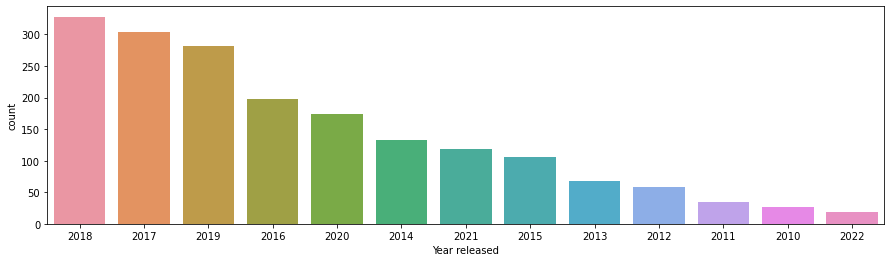

In [22]:
plt.figure(figsize=(15,4));
sns.countplot(x = 'Year released',
              data = resale_df,
              order = resale_df['Year released'].value_counts().index);

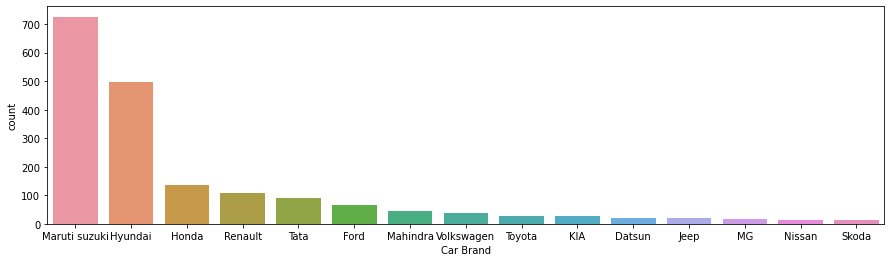

In [17]:
plt.figure(figsize=(15,4));
sns.countplot(x = 'Car Brand',
              data = resale_df,
              order = resale_df['Car Brand'].value_counts().index);

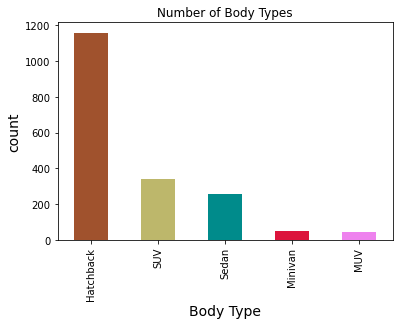

In [133]:
resale_df['Body type'].value_counts().plot.bar(color={'violet','darkcyan','darkkhaki','crimson','sienna'});
plt.title('Number of Body Types');
plt.xlabel('Body Type',fontsize=14);
plt.ylabel('count',fontsize=14);
plt.show();


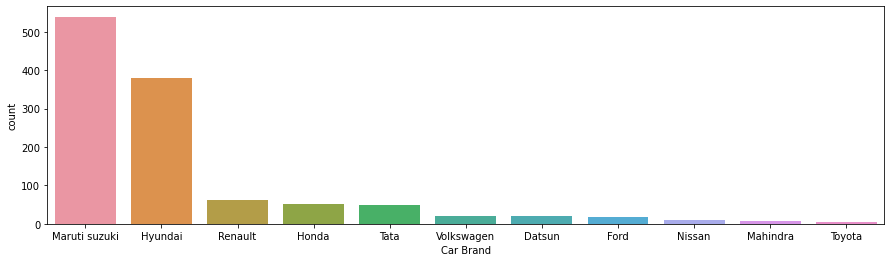

In [75]:
plt.figure(figsize=(15,4));
sns.countplot(x = 'Car Brand',
              data = hatchback_df,
              order = hatchback_df['Car Brand'].value_counts().index);

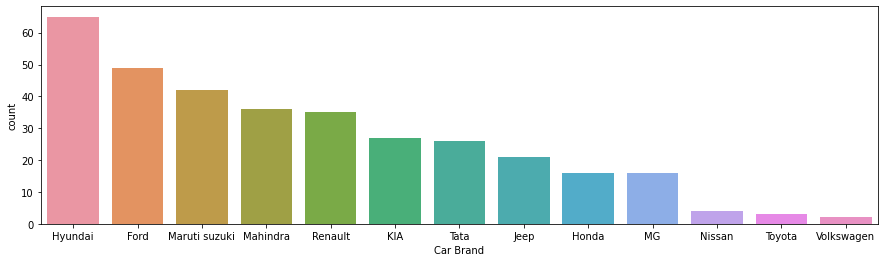

In [71]:
plt.figure(figsize=(15,4));
sns.countplot(x = 'Car Brand',
              data = SUV_df,
              order = SUV_df['Car Brand'].value_counts().index);

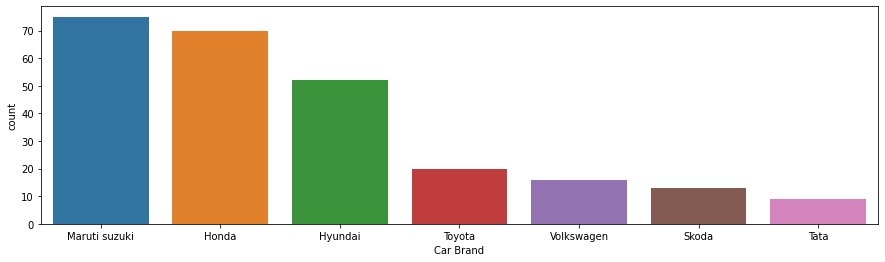

In [72]:
plt.figure(figsize=(15,4));
sns.countplot(x = 'Car Brand',
              data = Sedan_df,
              order = Sedan_df['Car Brand'].value_counts().index);

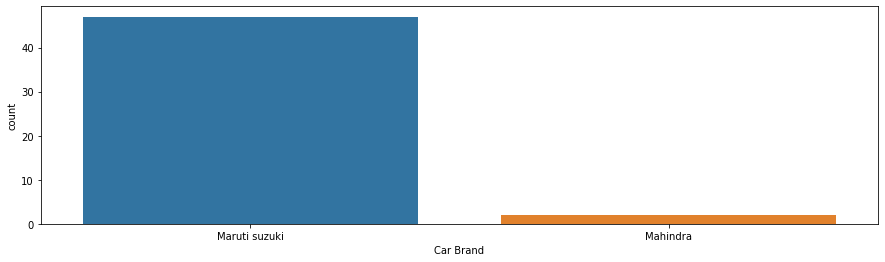

In [73]:
plt.figure(figsize=(15,4));
sns.countplot(x = 'Car Brand',
              data = Minivan_df,
              order = Minivan_df['Car Brand'].value_counts().index);

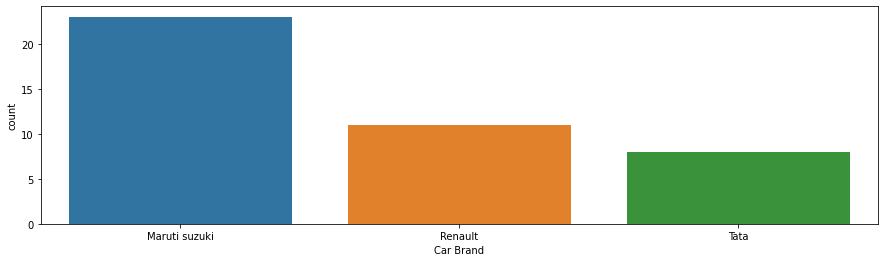

In [74]:
plt.figure(figsize=(15,4));
sns.countplot(x = 'Car Brand',
              data = MUV_df,
              order = MUV_df['Car Brand'].value_counts().index);

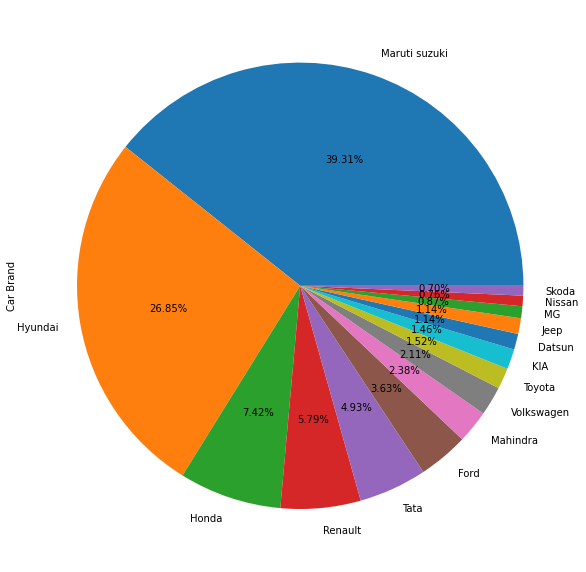

In [26]:
resale_df["Car Brand"].value_counts().plot.pie(figsize = (10,30), autopct="%.2f%%");

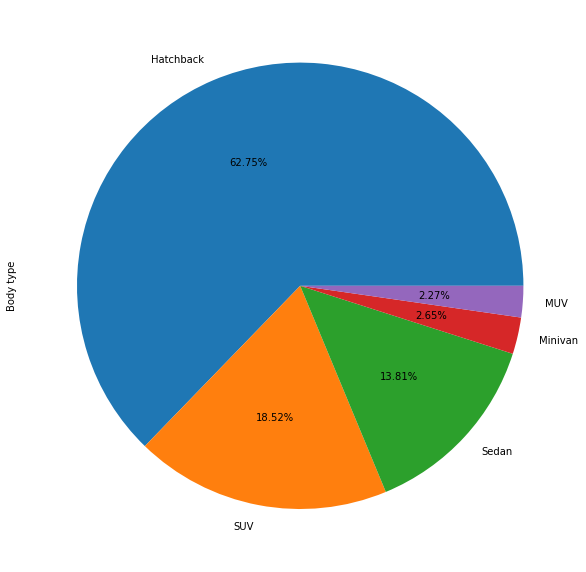

In [27]:
resale_df["Body type"].value_counts().plot.pie(figsize = (10,30), autopct="%.2f%%");

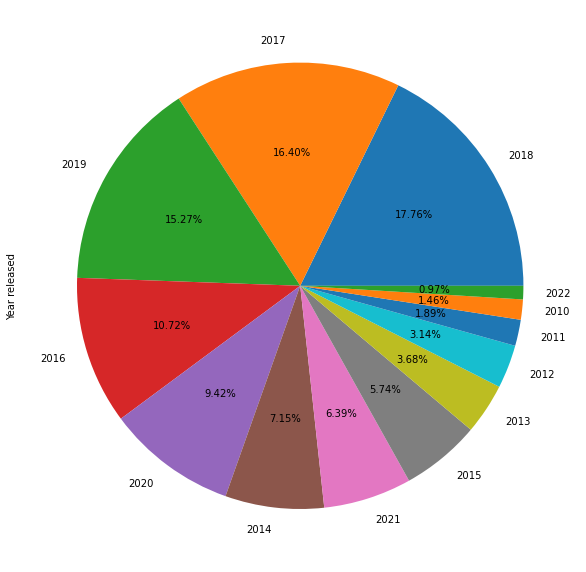

In [28]:
resale_df["Year released"].value_counts().plot.pie(figsize = (10,30), autopct="%.2f%%");

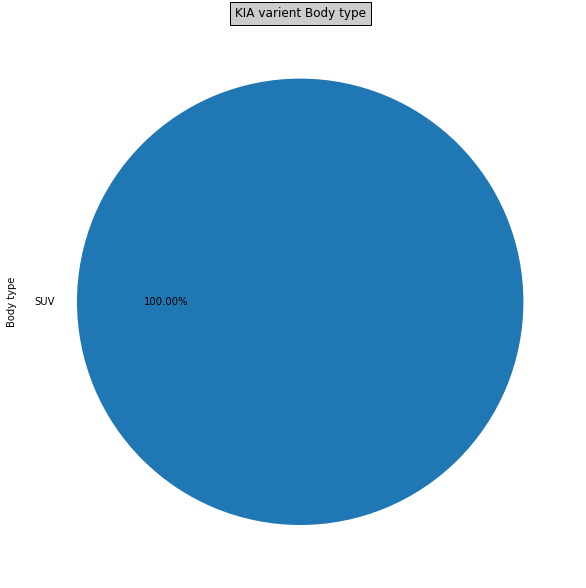

In [165]:
KIA_varient_df["Body type"].value_counts().plot.pie(figsize = (10,30), autopct="%.2f%%");
plt.title("KIA varient Body type", bbox={'facecolor':'0.8', 'pad':5});

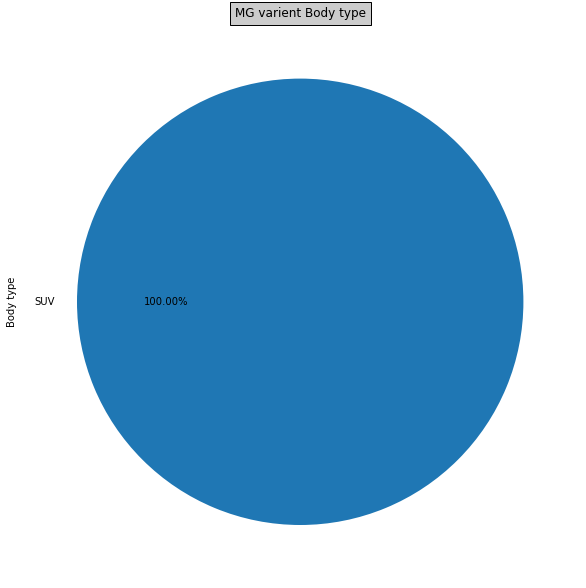

In [166]:
MG_varient_df["Body type"].value_counts().plot.pie(figsize = (10,30), autopct="%.2f%%");
plt.title("MG varient Body type", bbox={'facecolor':'0.8', 'pad':5});

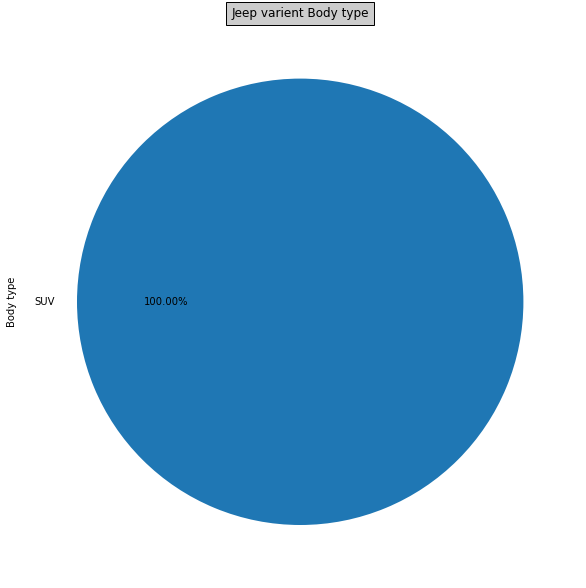

In [167]:
Jeep_varient_df["Body type"].value_counts().plot.pie(figsize = (10,30), autopct="%.2f%%");
plt.title("Jeep varient Body type", bbox={'facecolor':'0.8', 'pad':5});

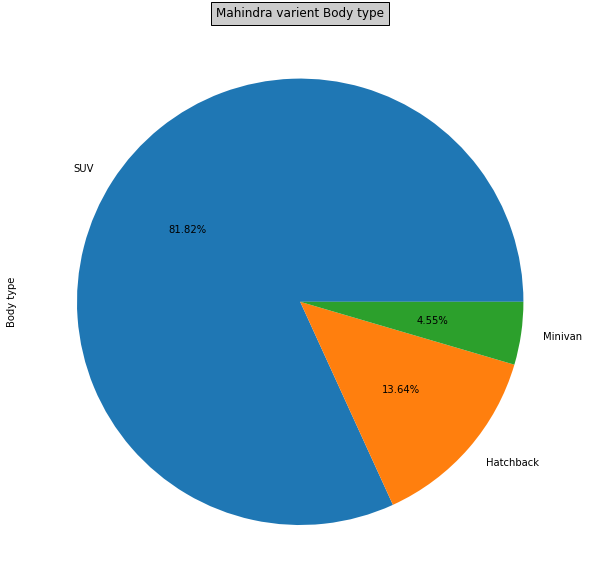

In [169]:
Mahindra_varient_df["Body type"].value_counts().plot.pie(figsize = (10,30), autopct="%.2f%%");
plt.title("Mahindra varient Body type", bbox={'facecolor':'0.8', 'pad':5});

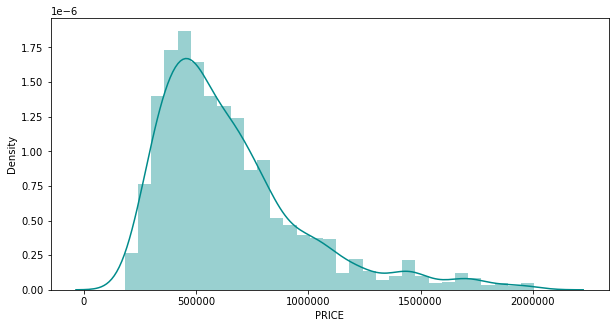

In [35]:
fig=plt.figure(figsize=(10,5));
m = sns.distplot( x=resale_df["Price INR(₹)"],color='darkcyan');
formatter = ticker.ScalarFormatter();
formatter.set_scientific(False);
plt.xticks(rotation = 0);
m.xaxis.set_major_formatter(formatter);
plt.xlabel('PRICE');
plt.show();

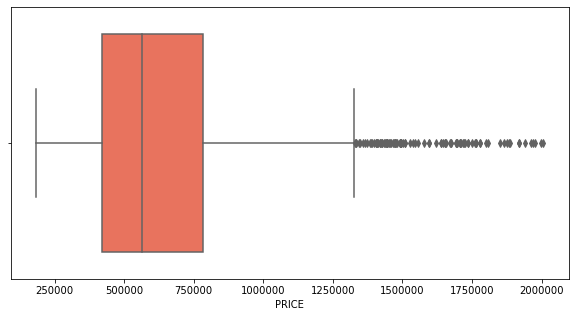

In [138]:
fig=plt.figure(figsize=(10,5))
m= sns.boxplot(data=resale_df,x="Price INR(₹)",color='tomato')
formatter = ticker.ScalarFormatter();
formatter.set_scientific(False);
plt.xticks(rotation = 0);
m.xaxis.set_major_formatter(formatter);
plt.xlabel('PRICE');
plt.show();

In [139]:
resale_df['Price INR(₹)'].quantile(0.25)

420899.0

In [140]:
resale_df['Price INR(₹)'].quantile(0.75)

784649.0

In [141]:
resale_df['Price INR(₹)'].quantile(0.50)

565299.0

In [ ]:
Hyundai_varient_df = hatchback_df.loc[hatchback_df['Car Brand'] == 'Hyundai']

## Bi variate

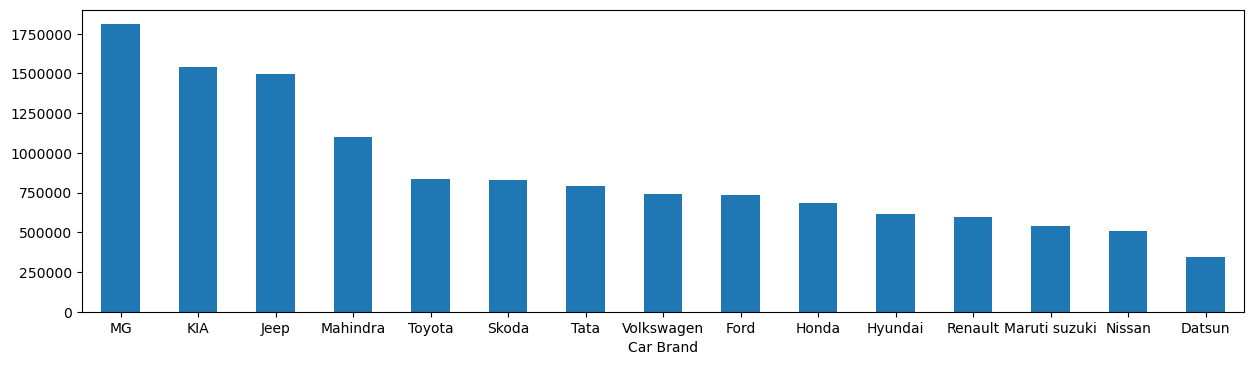

In [61]:
plt.figure(dpi = 100, figsize=(15,4));
m= resale_df.groupby(['Car Brand'])['Price INR(₹)'].mean().sort_values(ascending = False).plot(kind = 'bar');
formatter = ticker.ScalarFormatter();
formatter.set_scientific(False);
plt.xticks(rotation = 0);
m.yaxis.set_major_formatter(formatter);

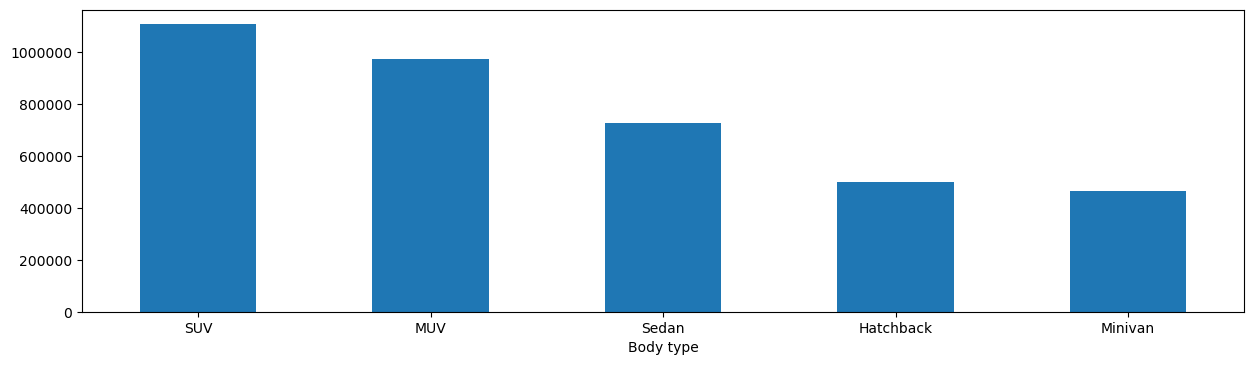

In [62]:
plt.figure(dpi = 100, figsize=(15,4));
m= resale_df.groupby(['Body type'])['Price INR(₹)'].mean().sort_values(ascending = False).plot(kind = 'bar');
formatter = ticker.ScalarFormatter();
formatter.set_scientific(False);
plt.xticks(rotation = 0);
m.yaxis.set_major_formatter(formatter);

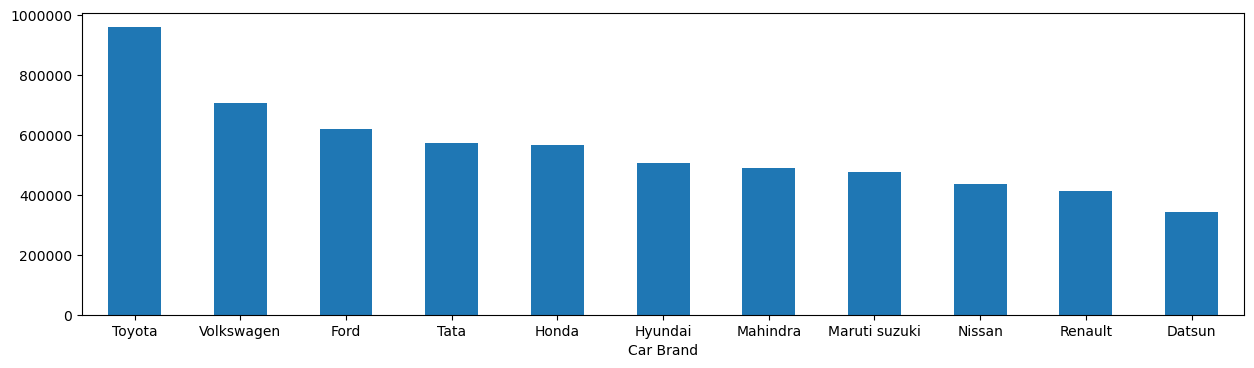

In [59]:
plt.figure(dpi = 100, figsize=(15,4));
m= hatchback_df.groupby(['Car Brand'])['Price INR(₹)'].mean().sort_values(ascending = False).plot(kind = 'bar');
formatter = ticker.ScalarFormatter();
formatter.set_scientific(False);
plt.xticks(rotation = 0);
m.yaxis.set_major_formatter(formatter);

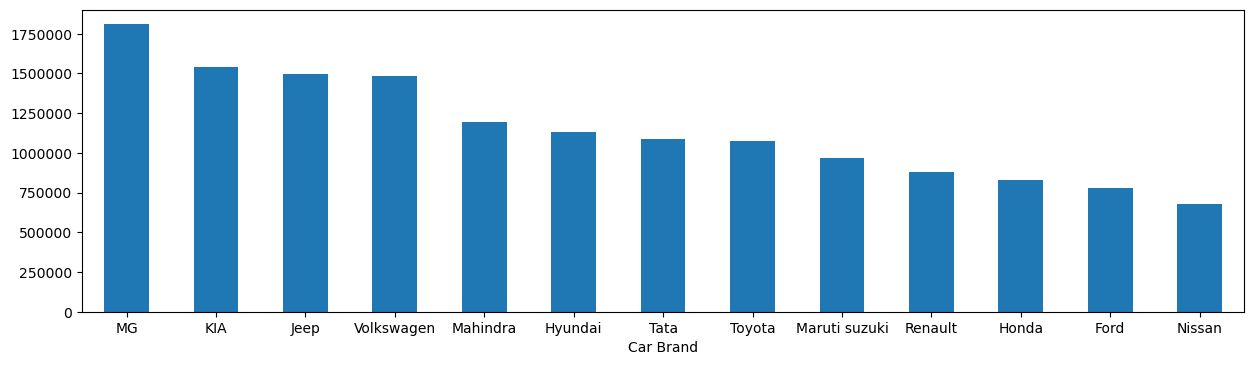

In [76]:
plt.figure(dpi = 100, figsize=(15,4));
m= SUV_df.groupby(['Car Brand'])['Price INR(₹)'].mean().sort_values(ascending = False).plot(kind = 'bar');
formatter = ticker.ScalarFormatter();
formatter.set_scientific(False);
plt.xticks(rotation = 0);
m.yaxis.set_major_formatter(formatter);

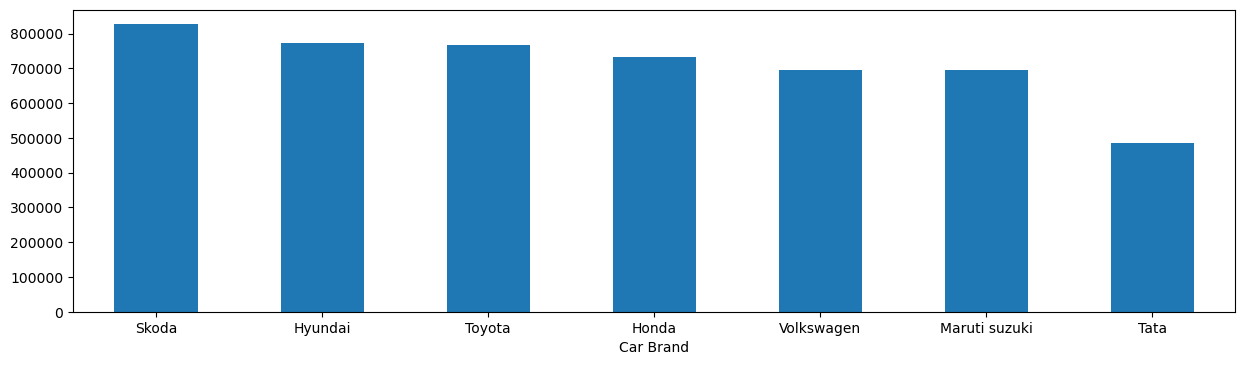

In [79]:
plt.figure(dpi = 100, figsize=(15,4));
m= Sedan_df.groupby(['Car Brand'])['Price INR(₹)'].mean().sort_values(ascending = False).plot(kind = 'bar');
formatter = ticker.ScalarFormatter();
formatter.set_scientific(False);
plt.xticks(rotation = 0);
m.yaxis.set_major_formatter(formatter);

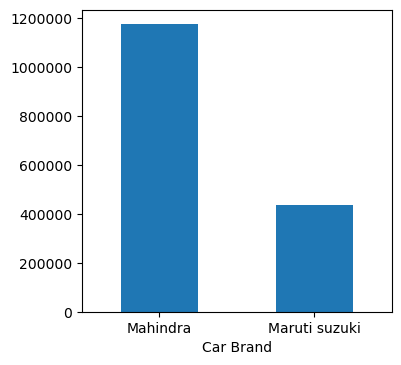

In [202]:
plt.figure(dpi = 100, figsize=(4,4));
m= Minivan_df.groupby(['Car Brand'])['Price INR(₹)'].mean().sort_values(ascending = False).plot(kind = 'bar');
formatter = ticker.ScalarFormatter();
formatter.set_scientific(False);
plt.xticks(rotation = 0);
m.yaxis.set_major_formatter(formatter);

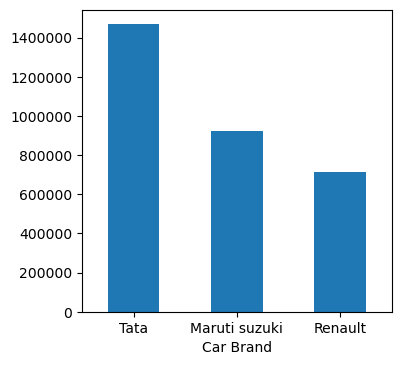

In [201]:
plt.figure(dpi = 100, figsize=(4,4));
m= MUV_df.groupby(['Car Brand'])['Price INR(₹)'].mean().sort_values(ascending = False).plot(kind = 'bar');
formatter = ticker.ScalarFormatter();
formatter.set_scientific(False);
plt.xticks(rotation = 0);
m.yaxis.set_major_formatter(formatter);

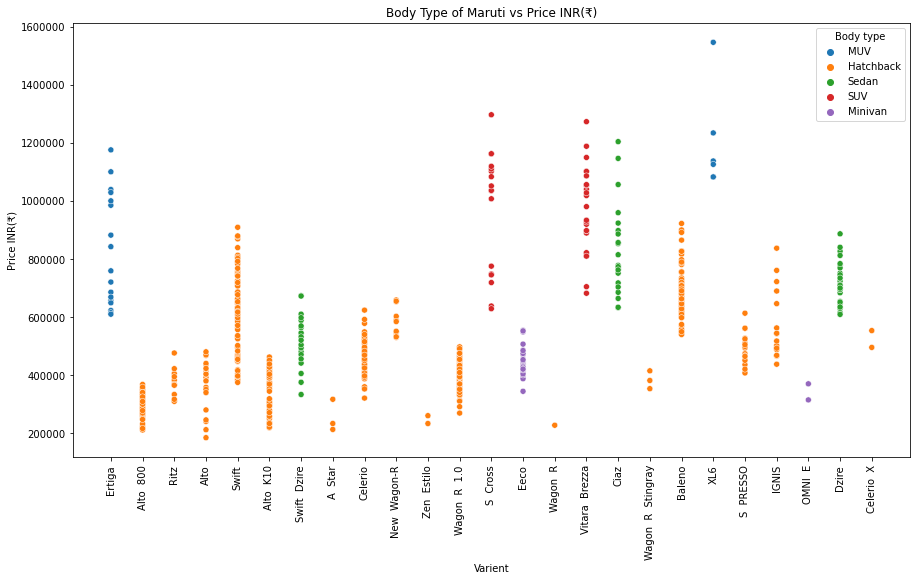

In [144]:
fig=plt.figure(figsize=(15,8));
m= sns.scatterplot(data=maurti_varient_df,x='Varient',y='Price INR(₹)',hue='Body type');
plt.title('Body Type of Maruti vs Price INR(₹)');
formatter = ticker.ScalarFormatter();
formatter.set_scientific(False);
plt.xticks(rotation = 90);
m.yaxis.set_major_formatter(formatter);


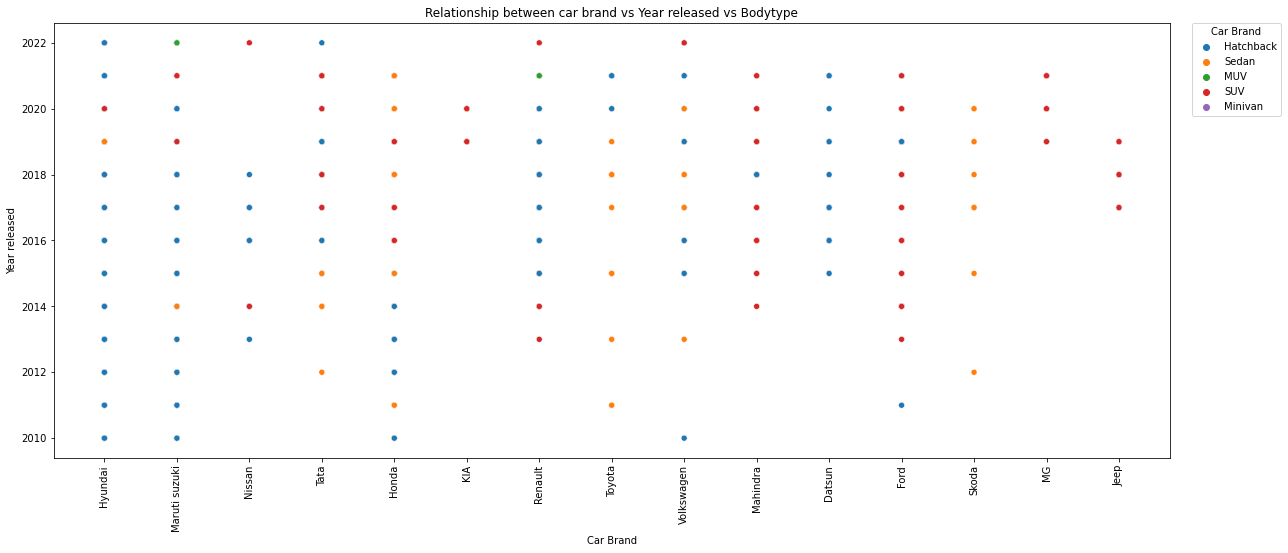

In [236]:
fig=plt.figure(figsize=(20,8));
m= sns.scatterplot(data=resale_df,x='Car Brand',y='Year released',hue='Body type');
plt.title('Relationship between car brand vs Year released vs Bodytype');
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Car Brand');
formatter = ticker.ScalarFormatter();
formatter.set_scientific(False);
plt.xticks(rotation = 90);
m.yaxis.set_major_formatter(formatter);


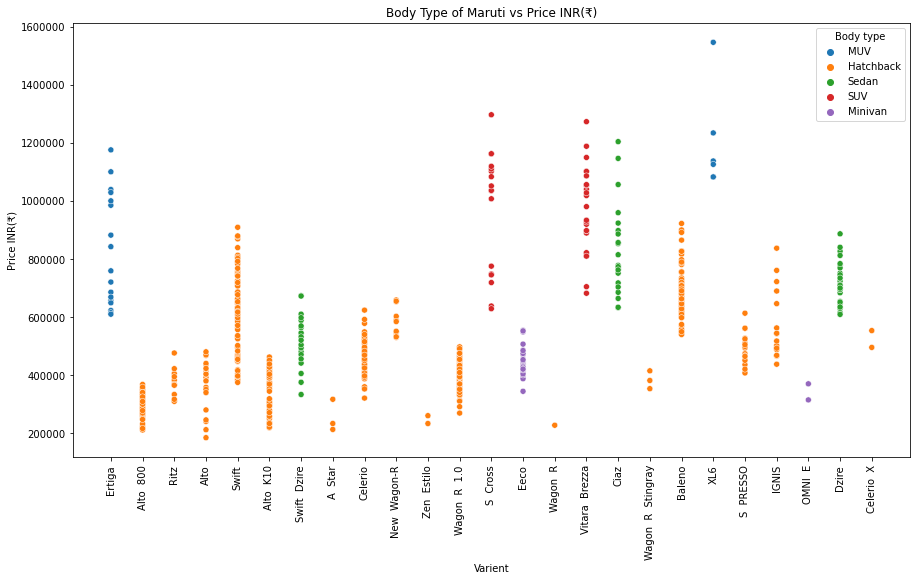

In [144]:
fig=plt.figure(figsize=(15,8));
m= sns.scatterplot(data=maurti_varient_df,x='Varient',y='Price INR(₹)',hue='Body type');
plt.title('Body Type of Maruti vs Price INR(₹)');
formatter = ticker.ScalarFormatter();
formatter.set_scientific(False);
plt.xticks(rotation = 90);
m.yaxis.set_major_formatter(formatter);


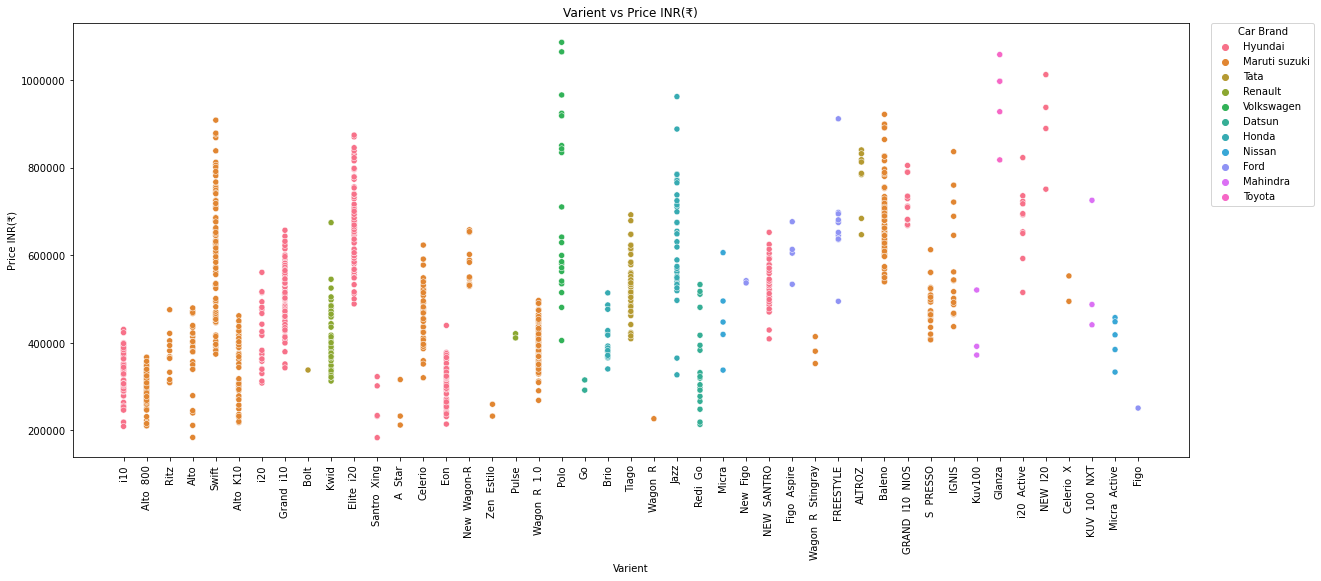

In [212]:
fig=plt.figure(figsize=(20,8));
m= sns.scatterplot(data=hatchback_df,x=hatchback_df['Varient'],y=hatchback_df['Price INR(₹)'],hue='Car Brand');
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Car Brand');
plt.title('Varient vs Price INR(₹)');
formatter = ticker.ScalarFormatter();
formatter.set_scientific(False);
plt.xticks(rotation = 90);
m.yaxis.set_major_formatter(formatter);

In [219]:
final_viz_df

In [221]:
resale_df.drop(['EMI (₹/month)'], axis=1,inplace=True)

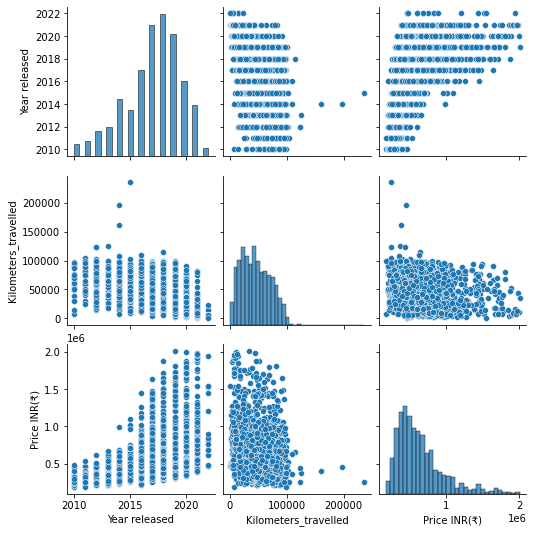

In [224]:
sns.pairplot(data=resale_df);
plt.show();

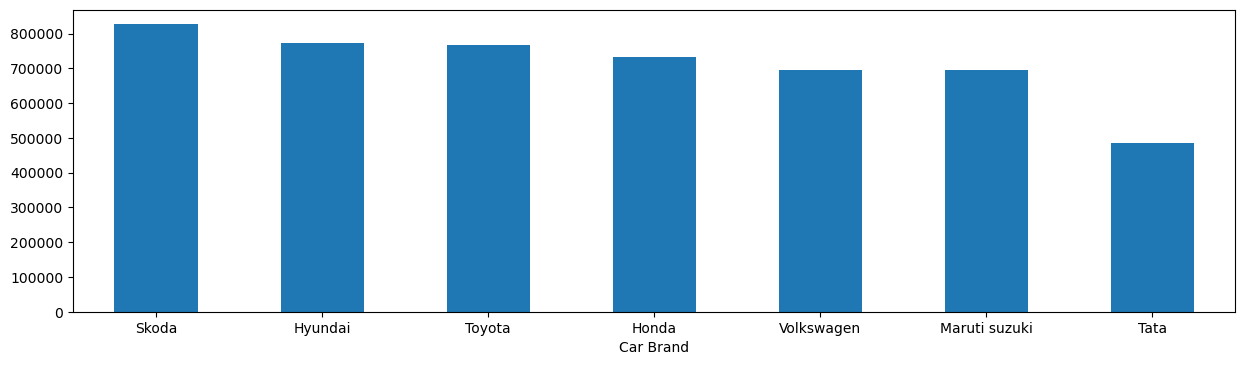

In [197]:
plt.figure(dpi = 100, figsize=(15,4));
m= Sedan_df.groupby(['Car Brand'])['Price INR(₹)'].mean().sort_values(ascending = False).plot(kind = 'bar');
formatter = ticker.ScalarFormatter();
formatter.set_scientific(False);
plt.xticks(rotation = 0);
m.yaxis.set_major_formatter(formatter);

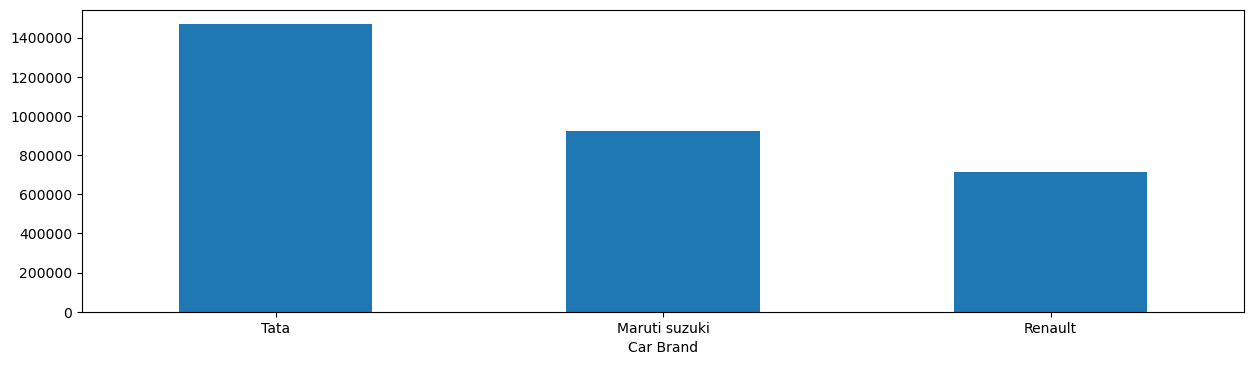

In [198]:
plt.figure(dpi = 100, figsize=(15,4));
m= MUV_df.groupby(['Car Brand'])['Price INR(₹)'].mean().sort_values(ascending = False).plot(kind = 'bar');
formatter = ticker.ScalarFormatter();
formatter.set_scientific(False);
plt.xticks(rotation = 0);
m.yaxis.set_major_formatter(formatter);

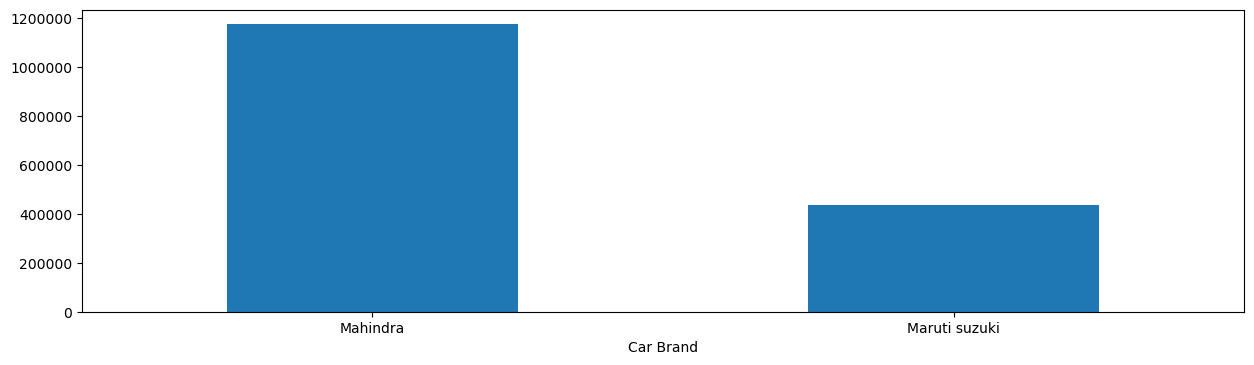

In [199]:
plt.figure(dpi = 100, figsize=(15,4));
m= Minivan_df.groupby(['Car Brand'])['Price INR(₹)'].mean().sort_values(ascending = False).plot(kind = 'bar');
formatter = ticker.ScalarFormatter();
formatter.set_scientific(False);
plt.xticks(rotation = 0);
m.yaxis.set_major_formatter(formatter);

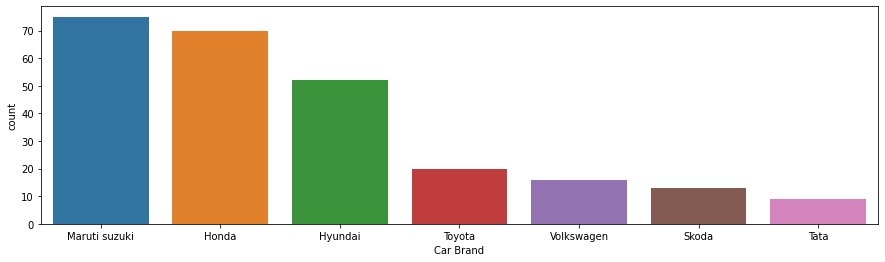

In [203]:
plt.figure(figsize=(15,4));
sns.countplot(x = 'Car Brand',
              data = Sedan_df,
              order = Sedan_df['Car Brand'].value_counts().index);

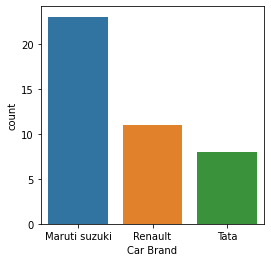

In [205]:
plt.figure(figsize=(4,4));
sns.countplot(x = 'Car Brand',
              data = MUV_df,
              order = MUV_df['Car Brand'].value_counts().index);

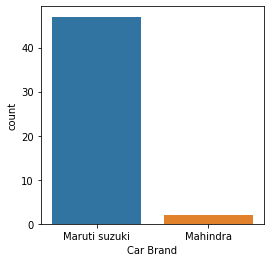

In [208]:
plt.figure(figsize=(4,4));
sns.countplot(x = 'Car Brand',
              data = Minivan_df,
              order = Minivan_df['Car Brand'].value_counts().index);